(6, 2)
X [[1.4]
 [1.3]
 [1.5]
 [4.5]
 [4.1]
 [4.6]]
y [0 0 0 1 1 1]


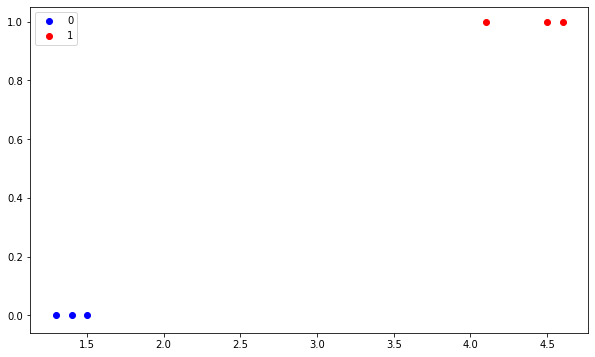

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

iris = np.genfromtxt('iris_1D_2c.csv', dtype=None, delimiter=',', skip_header=1) 
print(iris.shape)
X = iris[:, 0:1]
y = iris[:, 1]

#X = preprocessing.scale(X)
y = y.astype('uint8')

print('X', X)
print('y', y)

plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0][:, 0], y[y == 0], color='b', label='0')
plt.scatter(X[y == 1][:, 0], y[y == 1], color='r', label='1')
plt.legend()

In [4]:
iris = np.genfromtxt('iris_1D_2c.csv', delimiter=',', skip_header=1) 
X = iris[:, 0:1]
y = iris[:, 1]
y = y.astype('uint8')

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)
X = X.T

print(X)

[[1.  1.  1.  1.  1.  1. ]
 [1.4 1.3 1.5 4.5 4.1 4.6]]


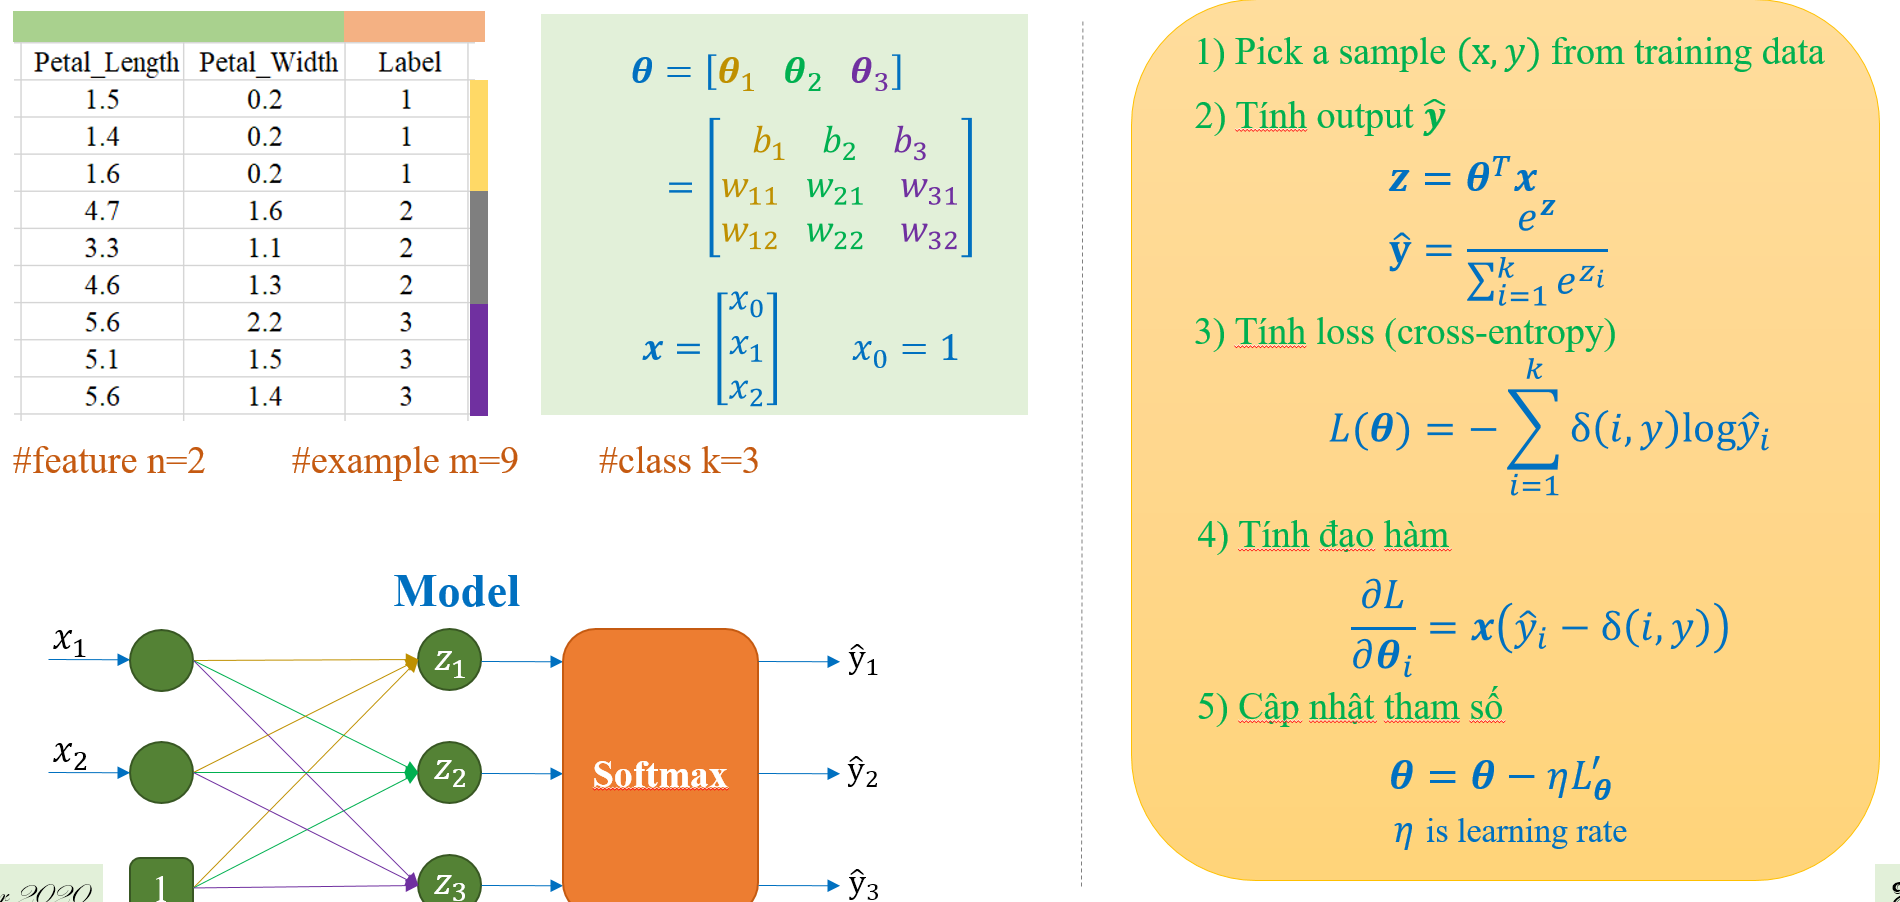

In [5]:
D = 1 # dimensionality
K = 2 # number of classes

# initialize parameters randomly
theta = np.random.randn(D+1,K)

In [22]:
scores = np.dot(theta.T, X)
print(scores)

[[ 3.27361521  3.01509929  3.53213113 11.28760861 10.25354495 11.54612453]
 [ 0.27663173  0.25942108  0.29384238  0.81016193  0.74131932  0.82737258]]


In [23]:
exp_scores = np.exp(scores)
print(exp_scores)

[[2.64066325e+01 2.03911155e+01 3.41967676e+01 7.98263247e+04
  2.83829800e+04 1.03375630e+05]
 [1.31868065e+00 1.29617948e+00 1.34157243e+00 2.24827202e+00
  2.09870255e+00 2.28730114e+00]]


In [24]:
sum_score = np.sum(exp_scores, axis=0, keepdims=True)
print(sum_score)

[[2.77253131e+01 2.16872950e+01 3.55383400e+01 7.98285730e+04
  2.83850787e+04 1.03377918e+05]]


In [25]:
probs = exp_scores / np.sum(exp_scores, axis=0, keepdims=True)
print(probs)

[[9.52437664e-01 9.40233234e-01 9.62249997e-01 9.99971836e-01
  9.99926063e-01 9.99977874e-01]
 [4.75623357e-02 5.97667659e-02 3.77500027e-02 2.81637506e-05
  7.39368236e-05 2.21256260e-05]]


In [26]:
probs[[0, 1, 1, 1, 1, 0], range(6)]

array([9.52437664e-01, 5.97667659e-02, 3.77500027e-02, 2.81637506e-05,
       7.39368236e-05, 9.99977874e-01])

In [16]:
scores = np.dot(X.T, theta)
print(scores)

[[ 3.27361521  0.27663173]
 [ 3.01509929  0.25942108]
 [ 3.53213113  0.29384238]
 [11.28760861  0.81016193]
 [10.25354495  0.74131932]
 [11.54612453  0.82737258]]


In [17]:
exp_scores = np.exp(scores)
print(exp_scores)

[[2.64066325e+01 1.31868065e+00]
 [2.03911155e+01 1.29617948e+00]
 [3.41967676e+01 1.34157243e+00]
 [7.98263247e+04 2.24827202e+00]
 [2.83829800e+04 2.09870255e+00]
 [1.03375630e+05 2.28730114e+00]]


In [18]:
sum_score = np.sum(exp_scores, axis=1, keepdims=True)
print(sum_score)

[[2.77253131e+01]
 [2.16872950e+01]
 [3.55383400e+01]
 [7.98285730e+04]
 [2.83850787e+04]
 [1.03377918e+05]]


In [20]:
probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
print(probs)

[[9.52437664e-01 4.75623357e-02]
 [9.40233234e-01 5.97667659e-02]
 [9.62249997e-01 3.77500027e-02]
 [9.99971836e-01 2.81637506e-05]
 [9.99926063e-01 7.39368236e-05]
 [9.99977874e-01 2.21256260e-05]]


In [27]:
iris = np.genfromtxt('iris_1D_2c.csv', delimiter=',', skip_header=1) 
X = iris[:, 0:1]
y = iris[:, 1]
y = y.astype('uint8')

intercept = np.ones((X.shape[0], 1))
X = np.concatenate((intercept, X), axis=1)
X = X.T

D = 1 # dimensionality
K = 2 # number of classes

# initialize parameters randomly
theta = np.random.randn(D+1,K)

# gradient descent loop
num_examples = X.shape[1]
learning_rate = 0.1

losses = []
num_iter = 100
for epoch in range(num_iter):    
    # evaluate class scores
    scores = np.dot(theta.T, X)

    #compute the class probabilities
    exp_scores = np.exp(scores)
    probs = exp_scores / np.sum(exp_scores, axis=0, keepdims=True)

    # compute the loss
    corect_logprobs = -np.log(probs[y, range(num_examples)])
    loss = np.sum(corect_logprobs)
    losses.append(loss)

    # compute the gradient on scores
    dscores = probs
    dscores[y, range(num_examples)] -= 1

    # backpropate the gradient to the parameters (W,b)
    dtheta = np.dot(X, dscores.T)

    # perform a parameter update
    theta += -learning_rate *dtheta

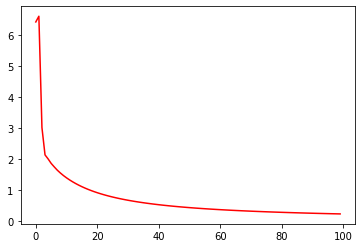

In [28]:
x_axis = range(len(losses))
plt.plot(x_axis,losses, color="r")
plt.show()

In [28]:
# evaluate training set accuracy
scores = np.dot(theta.T, X)
predicted_class = np.argmax(scores, axis=0)
print('Training accuracy: %.2f' % (np.mean(predicted_class == y)))

Training accuracy: 1.00
